In [188]:
import numpy as np
import matplotlib.pyplot as plt

## Beachte Konvention: alles in Winkelsekunden rechnen

### Observed Zenith angle

In [189]:
time_top = 15 * (np.array([11*60*60 + 42*60 +47, 11*60*60 + 44*60 +8, 11*60*60 + 56*60 +50,
                     11*60*60 + 57*60 +37, 12*60*60 + 4*60 +53, 
                     12*60*60 + 6*60 +3]) - 2*3600) # in arcsec, UT
z_b_top = np.array([39*3600+9*60+32, 39*3600 + 3*60+16, 38*3600 + 6*60+6, 38*3600 + 3*60+7, 37*3600 + 35*60+57, 37*3600 + 32*60+2])

time_bottom = 15 * (np.array([11*60*60 + 49*60 +8, 11*60*60 + 51*60 +3, 11*60*60 + 59*60 +29,
                     12*60*60 + 1*60 +11]) - 2*3600 )# in arcsec, UT
z_b_bottom = np.array([39*3600+12*60+26, 39*3600+4*60+52, 38*3600+29*60+1, 38*3600+21*60+33])

print(z_b_top)
print(z_b_bottom)

[140972 140596 137166 136987 135357 135122]
[141146 140692 138541 138093]


### Corrections

#### Index error

#### Refraction

#### Horizontal parallax

#### Transform to center of solar disk

### Almanac

In [190]:
GMST_0UT = (14*3600 + 52*60 + 28.7584) * 15
alpha_5 = 2.8197997 * 3600 * 15
alpha_6 = 2.8841898 * 3600 * 15
delta_5 = 16.262748 * 3600
delta_6 = 16.545533 * 3600
phi_1 = 15*60 + 51.58
phi_2 = 8.72 * 3600

l = (13 * 3600 + 17*60 + 42.5)/3600 # Längengrad in ''

### Interpolation alpha
alpha(t) = m*t + n

152269.18379999997 155746.24920000002
[2.84585906 2.84591942 2.84648731 2.84652234 2.84684727 2.84689944]


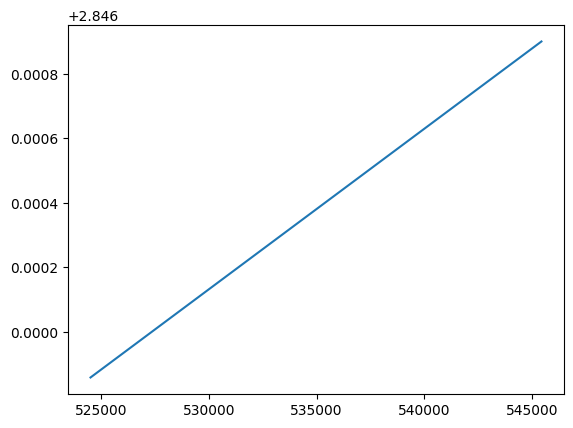

In [191]:
alpha_top = alpha_5/(3600*15) + time_top/(24*3600*15) * (alpha_6 - alpha_5)/(3600*15)
alpha_bottom = alpha_5/(3600*15) + time_bottom/(24*3600*15) * (alpha_6 - alpha_5)/(3600*15)

print(alpha_5, alpha_6)
print(alpha_top)

plt.plot(time_top, alpha_top)

### Interpolation delta

In [192]:
delta_top = delta_5/(3600) + time_top/(24*3600*15) * (delta_6 - delta_5)/(3600)
delta_bottom = delta_5/(3600) + time_bottom/(24*3600*15) * (delta_6 - delta_5)/(3600)

### Hour Angle in arcsec

In [193]:
tau_top = GMST_0UT/(3600*15) + time_top/(3600*15) * (366.24/365.24) - l/15 - alpha_top
tau_bottom = GMST_0UT/(3600*15) + time_bottom/(3600*15) * (366.24/365.24) - l/15 - alpha_bottom

In [194]:
# Y ist in Grad!
Y_top = np.arctan(np.cos(tau_top*np.pi/360*15) / np.tan(delta_top * np.pi/360*15)) # degree
Y_bottom = np.arctan(np.cos(tau_bottom*np.pi/360*15) / np.tan(delta_bottom * np.pi/360*15)) # degree

# einheitenlos
X_top = np.sin(delta_top*np.pi/360*15)*np.sqrt(1 + (np.cos(tau_top*np.pi/360*15)/ np.tan(delta_top*np.pi/360*15))** 2)
X_bottom = np.sin(delta_bottom*np.pi/360*15)*np.sqrt(1 + (np.cos(tau_bottom*np.pi/360*15)/ np.tan(delta_bottom*np.pi/360*15))** 2)

Y_top

array([0.5346494 , 0.53523913, 0.54058512, 0.54090293, 0.54378526,
       0.54423696])

In [195]:
b = (52 + 27 / 60 + 24 / 3600)*np.pi/180 # degree
print(Y_bottom + b)
print(Y_top + b < np.pi/2)
print(Y_top + b > -np.pi/2)


[1.45292892 1.45373741 1.45719624 1.45787405]
[ True  True  True  True  True  True]
[ True  True  True  True  True  True]


-> First solution for b!

In [196]:
#b_top = np.pi - np.arcsin(np.cos(z_b_top*np.pi/648000)/X_top) - Y_top 
#b_bottom = np.pi - np.arcsin(np.cos(z_b_bottom*np.pi/648000)/X_bottom) - Y_bottom

b_top = np.arcsin(np.cos(z_b_top)/X_top) - Y_top 
b_bottom = np.arcsin(np.cos(z_b_bottom)/X_bottom) - Y_bottom

print(b_bottom)
print(np.rad2deg(b_bottom))

[ 0.54824628 -0.04117387         nan -0.11614118]
[31.41219825 -2.3590891          nan -6.65439922]


C:\Users\mail\AppData\Local\Temp\ipykernel_31612\2542375166.py:5: RuntimeWarning: invalid value encountered in arcsin
  b_bottom = np.arcsin(np.cos(z_b_bottom)/X_bottom) - Y_bottom
